In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import eli5
from sklearn.preprocessing import LabelEncoder

In [11]:
dataset = pd.read_csv("./StudentsPerformance.csv")

In [12]:
# Check the missing values

dataset.isnull().mean() * 100

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [13]:
# Before looking at the correlation between give features, we need to encode all the "non-numerical" features

numerics = ["int16", "int32", "int64", "float32", "float64"]

categorical_features = []

for i in dataset.columns:
 if dataset[i].dtype not in numerics:
  categorical_features.append(i)
 
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [14]:
# Encode the columns that contain "categorical" values

le = LabelEncoder()

for i in categorical_features:
 dataset[i] = le.fit_transform(dataset[i])

dataset.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


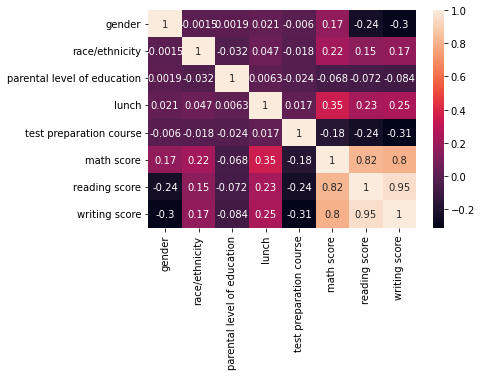

In [15]:
# Now, when we have all the values in our dataset being numericals we can take at the given correlation between these features

matrix = dataset.corr()
sns.heatmap(matrix, annot = True)
plt.show()

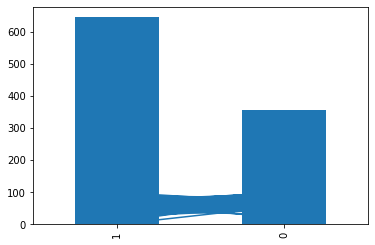

In [40]:
# From the heatmap above we can see correlation between different features we have in our dataset. This correlation shows that the most significant factor that impacts students' performance in the variety of disciplines is - presence of lunch. Let's take a look at the ratio of students who have and don't have lunch

dataset["lunch"].value_counts().plot(kind="bar")

[Text(0.5, 1.0, 'Reading score'), Text(0.5, 0, '')]

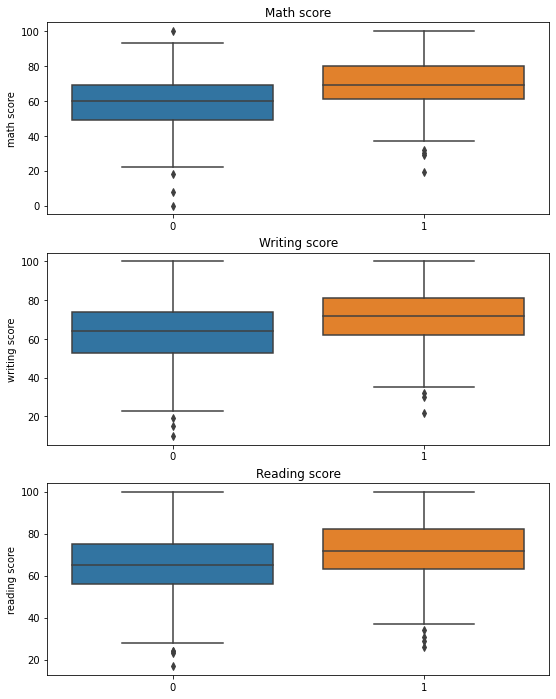

In [57]:
fig, axs = plt.subplots(3, figsize = (9, 12))
sns.boxplot(ax = axs[0], x = 'lunch', y = 'math score', data = dataset).set(title = "Math score", xlabel = None)
sns.boxplot(ax = axs[1], x = 'lunch', y = 'writing score', data = dataset).set(title = "Writing score", xlabel = None)
sns.boxplot(ax = axs[2], x = 'lunch', y = 'reading score', data = dataset).set(title = "Reading score", xlabel = None)